In [92]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastbook fastai duckduckgo_search;

Import packages

In [129]:
#|export
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *
from duckduckgo_search import DDGS
from fastcore.all import *

In [ ]:
Define the test set

In [130]:
architecture_styles = ['brutalism', 'modernism']

image_urls = {
    'brutalism': 'https://scontent.fsof8-1.fna.fbcdn.net/v/t39.30808-6/348926828_199702382963480_5292274693759943130_n.jpg?stp=cp6_dst-jpg&_nc_cat=111&ccb=1-7&_nc_sid=173fa1&_nc_ohc=0TMBwpZS7DcAX954E_3&_nc_ht=scontent.fsof8-1.fna&oh=00_AfD_VwBdTT4pI6MPzVQxxAbuZgUn9zrm22dxuEwhwovayQ&oe=65E8EE8C',
    'modernism': 'https://thishousedoesnotexist.org/assets/houses/5064608.png?_1663639383'

}

destinations = {
    'brutalism': 'images/brutalism.jpg',
    'modernism': 'images/modernism.jpg'
}

In [110]:
Download the test set

SyntaxError: invalid syntax (1051539678.py, line 1)

In [131]:
for url in image_urls:
    download_url(image_urls[url], destinations[url])

In [ ]:
Download the training set 

In [132]:
def search_images(term, max_image=100):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term, max_results=max_image)).itemgot('image')

path = Path('styles')
from time import sleep

for i in architecture_styles:
    dest = (path/i)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{i} architecture'))
    sleep(10)
    resize_images(path/i, max_size=400, dest=path/i)

Searching for 'brutalism architecture'
Searching for 'modernism architecture'


In [ ]:
Remove broken images

In [133]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

28

In [ ]:
Count of images we're going to train the model on

In [134]:
image_files = get_image_files(path)
len(image_files)

160

In [135]:
buildings = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(128, ResizeMethod.Squish)
)

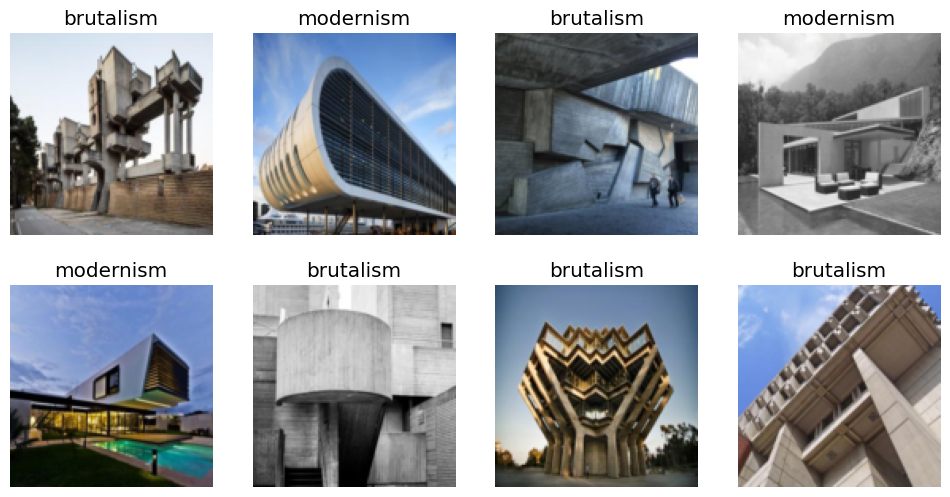

In [136]:
dls = buildings.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [137]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.615729,1.096224,0.562500,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.016636,0.961717,0.468750,00:08
1,0.805441,0.843640,0.406250,00:09
2,0.635115,1.023298,0.375000,00:08
3,0.509113,1.047415,0.343750,00:08
4,0.421787,1.013373,0.312500,00:08
5,0.347252,0.977353,0.250000,00:09
6,0.295770,0.945430,0.250000,00:09
7,0.255178,0.896436,0.250000,00:08
8,0.225590,0.860104,0.218750,00:08
9,0.199565,0.830705,0.218750,00:08


Architectural style: brutalism


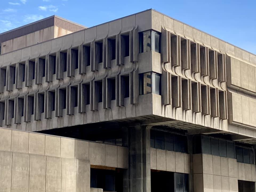

In [140]:
brutalism = destinations['brutalism']
modernism = destinations['modernism']
image = brutalism

architecture_style,_,probs = learn.predict(image)
print(f'Architectural style: {architecture_style}')
Image.open(image).to_thumb(256)

In [121]:
learn.export('brutalism_or_modernism.pkl')